# Problem Set 2 CS174
---
The following problem set will focus on the lessons on Numpy and advanced Python functions. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

In [8]:
import re
import nltk
import numpy as np
from string import punctuation
import matplotlib.pyplot as plt

In [19]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /Users/TL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/TL/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/TL/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
nltk.pos_tag

<function nltk.tag.pos_tag(tokens, tagset=None, lang='eng')>

#### 1. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**

In [7]:
def generate_matrix(n, a, b):
    return np.random.randint(low=a, high=b+1, size=(n, n))

In [8]:
generate_matrix(5, 1, 10)

array([[10,  5,  7,  3,  8],
       [ 4,  5,  1,  5,  6],
       [ 7,  2,  4,  6,  9],
       [10, 10,  7,  6, 10],
       [ 3,  3,  3,  8,  9]])

#### 2. Present a count plot of the top 20 occurring words in **data/networks.txt**. Use the stopword file **data/stop.txt** to filter out the stopwords **2 pts.**

#### Load the files:

In [9]:
with open("data/networks.txt") as f:
    [corpus] = f.readlines()

with open("data/stop.txt") as f:
    stop = set(line.strip(punctuation + ",\n") for line in f)

##### Tokenize, then remove stopwords and punctuation:

In [10]:
tokens = nltk.word_tokenize(corpus.lower())
tokens = [token for token in tokens if (token not in stop and token not in punctuation)]

##### Get top 20 words in ascending order:

In [11]:
word_freq = {}
for word in tokens:
    word_freq[word] = word_freq.get(word, 0) + 1
top_20_asc = sorted(word_freq.items(), key=lambda x: x[1])[-20:]

##### Create the bar plot:

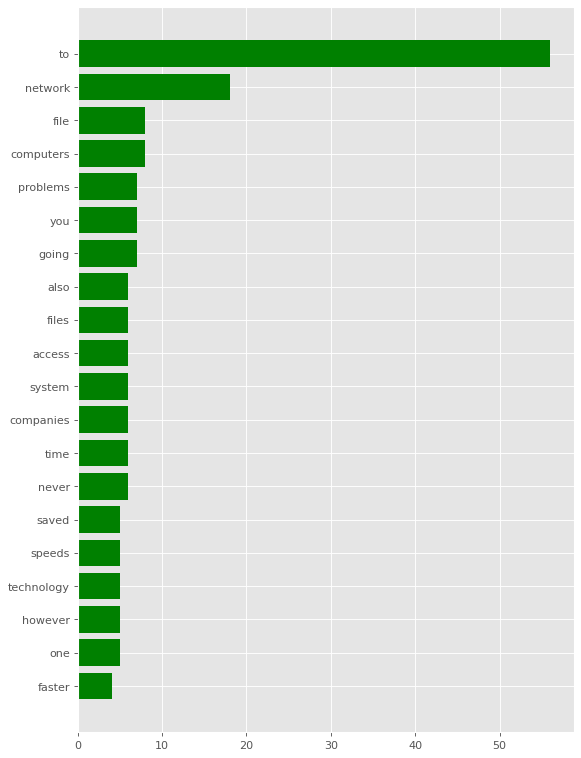

In [12]:
keys, values = zip(*top_20_asc)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 12), dpi=80)
ax.barh(keys, values, color='g')
plt.show()

#### 3. Using **data/ateneo.txt** and **data/tl-en.txt**, convert the phrases into straight english phrases. Leave words with no translation be. **6 pts.**

##### Load the files:

In [14]:
with open("data/ateneo.txt") as f:
    ateneo_text = f.readlines()

with open("data/tl-en.txt") as f:
    fil_to_eng = {}
    for line in f:
        fil, eng = line.strip().split()
        fil_to_eng[fil] = eng

##### Define a function for translating words:

In [156]:
def translate(string, dictionary):
    """Translate a string with the given dictionary.
    Steps:
    1. Group each space-separated substring into 3 parts:
        - Left punctuation
        - Word
        - Right punctuation
    2. "Un-capitalize" each word and translate with dictionary.
    3. Convert back to original capitalization and put back punctuations.
    """
    
    translated_text = []
    for substr in string.split():
        mo = re.search(r"([^a-zA-Z0-9]*)([\w'-.]*)([^a-zA-Z0-9]*)", substr)
        left_punc, word, right_punc = mo.groups()
        was_capitalized = False
        if word[0].isupper():
            word = word[0].lower() + word[1:]
            was_capitalized = True
        
        translated_word = dictionary.get(word, word)

        if was_capitalized:
            translated_word = translated_word[0].upper() + translated_word[1:]
        translated_text.append(left_punc + translated_word + right_punc)
    return ' '.join(translated_text)

##### Translate:

In [16]:
translated_text = [translate(s, fil_to_eng) for s in ateneo_text]
for original, translated in zip(ateneo_text, translated_text):
    print(f"original: {original.rstrip()}\ntranslated: {translated}\n" + '-'*50 )

original: "Manong, para lang d'yan sa may side."
translated: "Manong, to only d'yan sa have side."
--------------------------------------------------
original: "Mej hassle naman this rain."
translated: "Mej hassle naman this rain."
--------------------------------------------------
original: "Ano, bro? Katip later? G?"
translated: "What, bro? Katip later? G?"
--------------------------------------------------
original: "Wait, I'm like gonna dinner lang with the fambam."
translated: "Wait, I'm like gonna dinner only with the fambam."
--------------------------------------------------
original: "Which car am I gonna take today kaya?"
translated: "Which car am I gonna take today so?"
--------------------------------------------------
original: "Don't make tusok sa fishball muna, it's not lutong yet."
translated: "Don't make stitch sa fishball first, it's not cuisine yet."
--------------------------------------------------
original: "Kuya magkano po yung neon balls?"
translated: "Brother m

#### 4. Using **data/tl-en.txt**, create a one-to-one English to Filipino translation of your favorite English song. Develop functions to handle pluralities, and multiple entry results. Discuss your code and please put at least 1-liner docs for the functions. **10 pts.**

##### Load the dictionary:
Keys = words<br>
values = list of possible translations

By default, we always pick the first entry in the list for the translation.

In [133]:
eng_to_fil = {}

with open("data/tl-en.txt") as f:
    for line in f:
        fil, eng = line.strip().split()
        eng_to_fil[eng] = eng_to_fil.get(eng, []) + [fil]
        
list(eng_to_fil.items())[:10]

[('the', ['ang', 'mga', 'yung']),
 ('this', ['ito', 'nito']),
 ('on', ['noong']),
 ('there', ['may']),
 ('have', ['may']),
 ('as', ['bilang', 'gaya']),
 ('number', ['bilang']),
 ('not', ['hindi', 'hinde']),
 ('from', ['mula']),
 ('to', ['para', 'kay'])]

##### To handle plural forms:
1. Lemmatize first before translation.
2. Convert to Filipino plural form.

In [369]:
from nltk.stem import WordNetLemmatizer


def translate(string, dictionary):
    """Translate a string with the given dictionary.
    Steps:
    1. Split the string into a lsit of space-separated words and newlines
    2. Group each space-separated substring into 3 parts:
        - Left punctuation
        - Word
        - Right punctuation
    3. Lemmatize & Un-capitalize each word
    4. Translate with dictionary.
    5. Revert to original capitalization/plurality
    6. Put back punctuation marks
    """
    
    lemmatizer = WordNetLemmatizer()
    translated_text = []

    # Split the string
    lines = re.split("(\n+)", string)
    lines = [[w for w in line.split(" ")] if line!="\n" else ["\n"] for line in lines]
    substrings = [s for line in lines for s in line]

    for substr in substrings:
        if substr == "\n":
            translated_text.append("\n")
            continue
            
        # Group into 3
        mo = re.search(r"([^a-zA-Z0-9]*)([\w'-.]*)([^a-zA-Z0-9]*)", substr)
        left_punc, word, right_punc = mo.groups()
        was_capitalized = False

        if word == "":  # If substring is purely special characters
            translated_text.append(left_punc + right_punc)
            continue
        
        # Check if capitalized, convert to lowercase
        if word[0].isupper() and len(word) > 1:
            word = word[0].lower() + word[1:]
            was_capitalized = True
        elif word[0].isupper() and len(word) == 1:
            word = word[0].lower()
            was_capitalized = True
            
        # Check if plural
        word, pos = nltk.pos_tag([word])[0]

        # Lemmatize
        word = lemmatizer.lemmatize(word)       

        # Translate: always choose the first entry
        if word in dictionary:
            translated_word = dictionary[word][0]
        else:
            translated_word = word
        
        # If word was a plural noun, convert to plural form
        # Don't capitalize
        if pos == "NNS":
            translated_word = f"{'M' if was_capitalized else 'm'}ga {translated_word}"
            translated_text.append(left_punc + translated_word + right_punc)
            continue

        # Revert to original capitalization
        if was_capitalized and len(word) > 1:
            translated_word = translated_word[0].upper() + translated_word[1:]
        elif was_capitalized and len(word) == 1:
            translated_word = translated_word[0].upper()

        translated_text.append(left_punc + translated_word + right_punc)

    # Separate with space, except after newlines
    translated_text = [s+' ' if not re.search("(^\n+$)", s) else s for s in translated_text]
    return ''.join(translated_text)

##### Retrieve song:

In [364]:
if , "dff"):
    print("FOUND")

In [260]:
import lyricsgenius as lg

In [346]:
genius = lg.Genius()
song = genius.search_song("Raindrops Keep Falling on My Head")

Searching for "Raindrops Keep Falling on My Head"...
Done.


In [350]:
# Get rid of unicode characters
song.lyrics = re.sub(r'[^\x00-\xFF]',' ', song.lyrics)
print(song.lyrics)

Raindrops keep falling on my head
And just like the guy whose feet are too big for his bed
Nothin' seems to fit
Those raindrops are falling on my head, they keep falling

So I just did me some talkin' to the sun
And I said I didn't like the way he got things done
Sleepin' on the job
Those raindrops are falling on my head, they keep falling

But there's one thing I know
The blues they send to meet me won't defeat me
It won't be long till happiness steps up to greet me

Raindrops keep falling on my head
But that doesn't mean my eyes will soon be turnin' red
Crying's not for me
Cause I'm never gonna stop the rain by complainin'
Because I'm free
Nothing's worrying me

It won't be long till happiness steps up to greet me

Raindrops keep falling on my head
But that doesn't mean my eyes will soon be turnin' red
Crying's not for me
Cause I'm never gonna stop the rain by complainin'
Because I'm free
Nothing's worrying me


##### Translate the song:

In [371]:
translated_lyrics = translate(song.lyrics, eng_to_fil)
print(translated_lyrics)

Mga raindrop panatilihin bumabagsak noong my ulo 
And basta parang ang guy kaninong mga paa are rin malaking for kanyang kama 
Nothin' anyong para magkasya 
Those mga raindrop are bumabagsak noong my head, sila panatilihin bumabagsak 

Kaya I basta did me ilang talkin' para ang araw 
And I sinabi I didn't parang ang paraan siya nakuha mga bagay done 
Sleepin' noong ang trabaho 
Those mga raindrop are bumabagsak noong my head, sila panatilihin bumabagsak 

Ngunit there's isa bagay I kilala 
Ang mga blue sila magpadala para kilalanin me won't pagkatalo me 
It won't maging haba till saya mga hakbang pataas para mabati me 

Mga raindrop panatilihin bumabagsak noong my ulo 
Ngunit yan doesn't mean my mga mata will nagtagal maging turnin' red 
Crying's hindi for me 
Sanhi I'm never makapag tumigil ang ulan by complainin' 
Dahil I'm free 
Nothing's inaalala me 

It won't maging haba till saya mga hakbang pataas para mabati me 

Mga raindrop panatilihin bumabagsak noong my ulo 
Ngunit yan does

### Bonus:
Repeat #4 but do a Filipino to English translation of your favorite Filipno song. Same specs apply. **5 pts.**

Deadline **Feb 20 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**